In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Exploration and Visualization

In [66]:
left = df[df.left == 1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [67]:
retained = df[df.left == 0]
retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [69]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Plot bar charts showing impact of employee salaries on retention**

In [70]:
import seaborn as sns

<Axes: xlabel='salary', ylabel='count'>

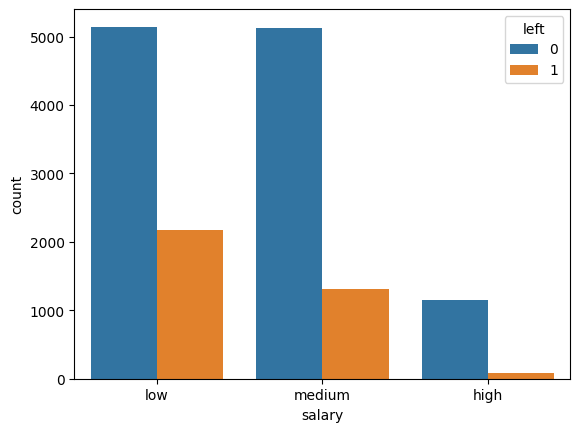

In [71]:
sns.countplot(x='salary', data=df, hue='left')

**Plot bar charts showing corelation between department and employee retention**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

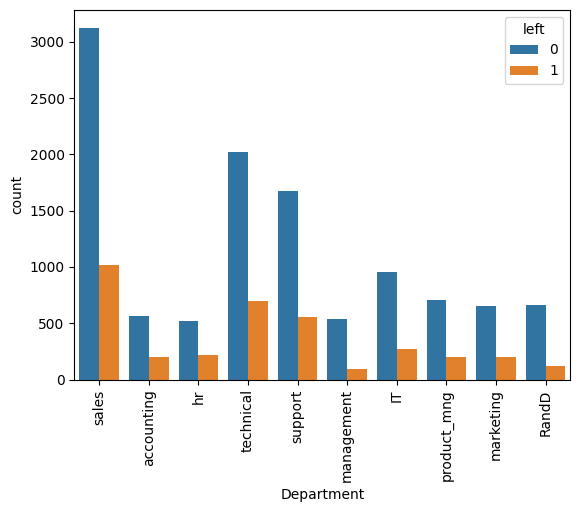

In [74]:
sns.countplot(x='Department', hue='left', data=df)
plt.xticks(rotation=90)

In [75]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [78]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary", dtype=int)

In [79]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [80]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()

In [39]:
model.fit(df[['average_montly_hours', 'promotion_last_5years']], df['left'])

LogisticRegression()

In [41]:
x = pd.concat([df['average_montly_hours'], df['promotion_last_5years']], axis='columns')

In [42]:
x

,average_montly_hours,promotion_last_5years
0,157,0
1,262,0
2,272,0
3,223,0
4,159,0
...,...,...
14994,151,0
14995,160,0
14996,143,0
14997,280,0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [46]:
X_train

,average_montly_hours,promotion_last_5years
641,228,0
830,220,0
5456,269,0
3445,194,0
9925,245,0
...,...,...
236,151,0
8085,98,0
14378,132,0
7387,270,0


In [48]:
X_test

,average_montly_hours,promotion_last_5years
11200,210,0
13883,245,0
12021,147,0
11279,222,0
1260,260,0
...,...,...
1300,284,0
6382,232,0
12808,236,0
4805,148,0


In [49]:
y_test

11200    0
13883    0
12021    1
11279    0
1260     1
        ..
1300     1
6382     0
12808    0
4805     0
13614    0
Name: left, Length: 1500, dtype: int64

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
model.score(X_test, y_test)

0.768

TypeError: unhashable type: 'numpy.ndarray'

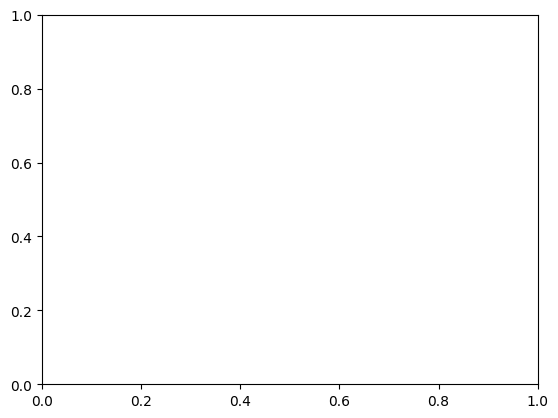

In [58]:
plt.scatter(df[['salary']], df['left'])

In [59]:
dummies = pd.get_dummies(df['salary'], dtype=int)

In [60]:
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [62]:
merged = pd.concat([dummies, df.left], axis='columns')

ValueError: x and y must be the same size

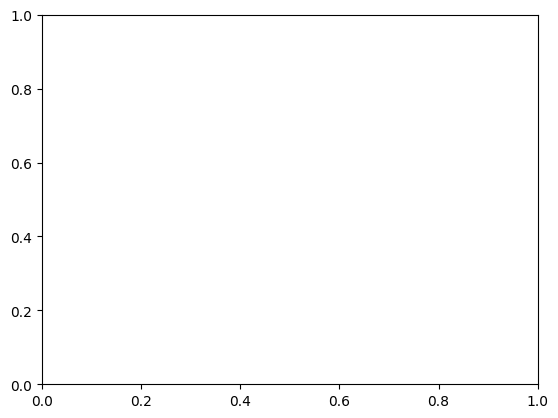

In [63]:
plt.scatter(merged[['high', 'medium', 'low']], merged['left'])